# CBP

### Nationwide Encounters By Area of Responsability - Component

Encounter data includes U.S. Border Patrol Title 8 apprehensions, Office of Field Operations Title 8 inadmissibles, and all Title 42 expulsions for fiscal years 2020 to date. Data is available for the Northern Land Border, Southwest Land Border, and Nationwide (i.e., air, land, and sea modes of transportation) encounters.

Data is extracted from live CBP systems and data sources. Statistical information is subject to change due to corrections, systems changes, change in data definition, additional information, or encounters pending final review. Final statistics are available at the conclusion of each fiscal year. 


La bd se tiene que tratar con los siguientes pasos:

1) Subsetear solo Land Border Region = Southwest Land Border
2) Group 'Encounter Count' column sums By = 'Fiscal Year' = Unique ,'Component' = Unique, 'Area of Responsibility' = Unique, 'Title of Authority' = Unique

In [62]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


In [13]:
# Especifica la ruta al archivo que quieres cargar
archivo_path = '/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/2. datos_estadisticos/2. CBO_Southwest_land_border_events/nationwide-encounters-fy20-fy23-aor.csv'

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(archivo_path)


In [14]:
df.shape

(53859, 12)

In [24]:
df.head()

,Fiscal Year,Month Grouping,Month (abbv),Component,Land Border Region,Area of Responsibility,AOR (Abbv),Demographic,Citizenship,Title of Authority,Encounter Type,Encounter Count
0,2020,FYTD,APR,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,FMUA,BRAZIL,Title 8,Inadmissibles,3
1,2020,FYTD,APR,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,FMUA,CANADA,Title 8,Inadmissibles,1
2,2020,FYTD,APR,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,Single Adults,CANADA,Title 42,Expulsions,2
3,2020,FYTD,APR,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,Single Adults,CANADA,Title 8,Inadmissibles,239
4,2020,FYTD,APR,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,Single Adults,"CHINA, PEOPLES REPUBLIC OF",Title 42,Expulsions,1


### Fitrado de BD

df['Land Border Region'] == 'Southwest Land Border') & (df['Fiscal Year'] == 2023)

In [16]:
# Filtrar el DataFrame basado en las condiciones especificadas
SWLB_23 = df[(df['Land Border Region'] == 'Southwest Land Border') & (df['Fiscal Year'] == 2023)]


In [18]:
SWLB_23.tail()

,Fiscal Year,Month Grouping,Month (abbv),Component,Land Border Region,Area of Responsibility,AOR (Abbv),Demographic,Citizenship,Title of Authority,Encounter Type,Encounter Count
53854,2023,FYTD,SEP,U.S. Border Patrol,Southwest Land Border,Yuma Sector,YUM,UC / Single Minors,MEXICO,Title 8,Apprehensions,14
53855,2023,FYTD,SEP,U.S. Border Patrol,Southwest Land Border,Yuma Sector,YUM,UC / Single Minors,NICARAGUA,Title 8,Apprehensions,3
53856,2023,FYTD,SEP,U.S. Border Patrol,Southwest Land Border,Yuma Sector,YUM,UC / Single Minors,OTHER,Title 8,Apprehensions,8
53857,2023,FYTD,SEP,U.S. Border Patrol,Southwest Land Border,Yuma Sector,YUM,UC / Single Minors,PERU,Title 8,Apprehensions,19
53858,2023,FYTD,SEP,U.S. Border Patrol,Southwest Land Border,Yuma Sector,YUM,UC / Single Minors,VENEZUELA,Title 8,Apprehensions,1


In [19]:
# Columnas de la df
# Imprimir los nombres de todas las columnas en el DataFrame
print(SWLB_23.columns)

Index(['Fiscal Year', 'Month Grouping', 'Month (abbv)', 'Component',
       'Land Border Region', 'Area of Responsibility', 'AOR (Abbv)',
       'Demographic', 'Citizenship', 'Title of Authority', 'Encounter Type',
       'Encounter Count'],
      dtype='object')


In [23]:
# Obtener los valores únicos en la columna 'Month (abbv)'
valores_unicos = agrupado['Fiscal Year'].unique()

# Imprimir los valores únicos
print(valores_unicos)


[2023]


In [41]:
# Definir las columnas por las cuales agrupar
columnas_para_agrupar = ['Fiscal Year', 'Component', 'Area of Responsibility']


In [42]:
# Agrupar por las columnas especificadas y sumar los 'Encounter Count'
agrupado = SWLB_23.groupby(columnas_para_agrupar)['Encounter Count'].sum().reset_index()


In [43]:
agrupado.tail()

,Fiscal Year,Component,Area of Responsibility,Encounter Count
8,2023,U.S. Border Patrol,Laredo Sector,45644
9,2023,U.S. Border Patrol,Rio Grande Valley Sector,338337
10,2023,U.S. Border Patrol,San Diego Sector,230941
11,2023,U.S. Border Patrol,Tucson Sector,373625
12,2023,U.S. Border Patrol,Yuma Sector,174201


In [55]:
# Crear un subset con solo las filas para "U.S. Border Patrol"
SWLB_23_USBP = agrupado[agrupado['Component'] == 'U.S. Border Patrol']

# Mostrar el resultado
print(SWLB_23_USBP)

# Crear un subset con solo las filas para "Office of Field Operations"
SWLB_23_OFO = agrupado[agrupado['Component'] == 'Office of Field Operations']

# Mostrar el resultado
print(SWLB_23_OFO)


    Fiscal Year           Component    Area of Responsibility  Encounter Count
4          2023  U.S. Border Patrol           Big Bend Sector            11823
5          2023  U.S. Border Patrol            Del Rio Sector           393226
6          2023  U.S. Border Patrol          El Centro Sector            50570
7          2023  U.S. Border Patrol            El Paso Sector           427471
8          2023  U.S. Border Patrol             Laredo Sector            45644
9          2023  U.S. Border Patrol  Rio Grande Valley Sector           338337
10         2023  U.S. Border Patrol          San Diego Sector           230941
11         2023  U.S. Border Patrol             Tucson Sector           373625
12         2023  U.S. Border Patrol               Yuma Sector           174201
   Fiscal Year                   Component  Area of Responsibility  \
0         2023  Office of Field Operations    El Paso Field Office   
1         2023  Office of Field Operations     Laredo Field Office   


#### Asi podemos ver el total de detenciones por AOR

In [46]:
SWLB_23_USBP

,Fiscal Year,Component,Area of Responsibility,Encounter Count
4,2023,U.S. Border Patrol,Big Bend Sector,11823
5,2023,U.S. Border Patrol,Del Rio Sector,393226
6,2023,U.S. Border Patrol,El Centro Sector,50570
7,2023,U.S. Border Patrol,El Paso Sector,427471
8,2023,U.S. Border Patrol,Laredo Sector,45644
9,2023,U.S. Border Patrol,Rio Grande Valley Sector,338337
10,2023,U.S. Border Patrol,San Diego Sector,230941
11,2023,U.S. Border Patrol,Tucson Sector,373625
12,2023,U.S. Border Patrol,Yuma Sector,174201


In [48]:
SWLB_23

,Fiscal Year,Month Grouping,Month (abbv),Component,Land Border Region,Area of Responsibility,AOR (Abbv),Demographic,Citizenship,Title of Authority,Encounter Type,Encounter Count
38003,2023,FYTD,APR,Office of Field Operations,Southwest Land Border,El Paso Field Office,El Paso,Accompanied Minors,ECUADOR,Title 42,Expulsions,2
38004,2023,FYTD,APR,Office of Field Operations,Southwest Land Border,El Paso Field Office,El Paso,Accompanied Minors,GUATEMALA,Title 42,Expulsions,4
38005,2023,FYTD,APR,Office of Field Operations,Southwest Land Border,El Paso Field Office,El Paso,Accompanied Minors,MEXICO,Title 42,Expulsions,9
38006,2023,FYTD,APR,Office of Field Operations,Southwest Land Border,El Paso Field Office,El Paso,Accompanied Minors,MEXICO,Title 8,Inadmissibles,2
38007,2023,FYTD,APR,Office of Field Operations,Southwest Land Border,El Paso Field Office,El Paso,Accompanied Minors,OTHER,Title 42,Expulsions,1
...,...,...,...,...,...,...,...,...,...,...,...,...
53854,2023,FYTD,SEP,U.S. Border Patrol,Southwest Land Border,Yuma Sector,YUM,UC / Single Minors,MEXICO,Title 8,Apprehensions,14
53855,2023,FYTD,SEP,U.S. Border Patrol,Southwest Land Border,Yuma Sector,YUM,UC / Single Minors,NICARAGUA,Title 8,Apprehensions,3
53856,2023,FYTD,SEP,U.S. Border Patrol,Southwest Land Border,Yuma Sector,YUM,UC / Single Minors,OTHER,Title 8,Apprehensions,8
53857,2023,FYTD,SEP,U.S. Border Patrol,Southwest Land Border,Yuma Sector,YUM,UC / Single Minors,PERU,Title 8,Apprehensions,19


In [54]:
#Validamos haciendo un conteo por año de la bd original y la bd procesada
# Asegurarse de que 'Encounter Count' es numérico
SWLB_23_USBP['Encounter Count'] = pd.to_numeric(SWLB_23_USBP['Encounter Count'], errors='coerce')
SWLB_23_OFO['Encounter Count'] = pd.to_numeric(SWLB_23_OFO['Encounter Count'], errors='coerce')
SWLB_23['Encounter Count'] = pd.to_numeric(SWLB_23['Encounter Count'], errors='coerce')

# Sumar los valores de 'Encounter Count'
total_encounters = SWLB_23_USBP['Encounter Count'].sum()
total_encounters0 = SWLB_23_OFO['Encounter Count'].sum()
total_encounters1 = SWLB_23['Encounter Count'].sum()


print(f"El total de 'Encounter Count' para 'U.S. Border Patrol' es: {total_encounters}")


print(f"El total de 'Encounter Count' para 'Office of Field Operations	Southwest Land Border' es: {total_encounters0}")


print(f"El total de 'Encounter Count' para todos es: {total_encounters1}")


El total de 'Encounter Count' para 'U.S. Border Patrol' es: 2045838
El total de 'Encounter Count' para 'Office of Field Operations	Southwest Land Border' es: 429831
El total de 'Encounter Count' para todos es: 2475669


/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_82049/1622853252.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SWLB_23_USBP['Encounter Count'] = pd.to_numeric(SWLB_23_USBP['Encounter Count'], errors='coerce')
/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_82049/1622853252.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SWLB_23_OFO['Encounter Count'] = pd.to_numeric(SWLB_23_OFO['Encounter Count'], errors='coerce')
/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_820

### Cargamos los archivos SHP de los poligonos que creamos en arcgis


In [58]:
import geopandas as gpd

# Lista de rutas a los archivos .shp
archivos_shp = [
    '/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/2. datos_estadisticos/2. CBO_Southwest_land_border_events/cbo_sectors_geodata/Big Bend Sector/Big Bend Sector.shp',
    '/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/2. datos_estadisticos/2. CBO_Southwest_land_border_events/cbo_sectors_geodata/Del Rio Sector/Del Rio Sector.shp',
    '/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/2. datos_estadisticos/2. CBO_Southwest_land_border_events/cbo_sectors_geodata/El Centro Sector/El Centro Sector.shp',
    '/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/2. datos_estadisticos/2. CBO_Southwest_land_border_events/cbo_sectors_geodata/El Paso Sector/El Paso Sector.shp',
    '/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/2. datos_estadisticos/2. CBO_Southwest_land_border_events/cbo_sectors_geodata/Laredo Sector/Laredo Sector.shp',
    '/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/2. datos_estadisticos/2. CBO_Southwest_land_border_events/cbo_sectors_geodata/Rio Grande Valley Sector/Rio Grande Valley Sector.shp',
    '/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/2. datos_estadisticos/2. CBO_Southwest_land_border_events/cbo_sectors_geodata/San Diego Sector/San Diego Sector.shp',
    '/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/2. datos_estadisticos/2. CBO_Southwest_land_border_events/cbo_sectors_geodata/Tucson Sector/Tucson Sector.shp',
    '/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/2. datos_estadisticos/2. CBO_Southwest_land_border_events/cbo_sectors_geodata/x/Yuma Sector.shp'
]

# Cargar cada archivo .shp y almacenarlos en una lista de GeoDataFrames
gdfs = [gpd.read_file(shp) for shp in archivos_shp]

# Unir todos los GeoDataFrames en uno solo
gdf_unido = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

# Asegurarse de que el CRS es uniforme en todos ellos, por ejemplo, usando el CRS del primer archivo cargado
gdf_unido.crs = gdfs[0].crs



In [65]:
# Diccionario de reemplazos: clave = valor actual, valor = nuevo valor
reemplazos = {
    "Adair County": "Big Bend Sector",
    "Brown County": "Del Rio Sector",
    "Imperial County": "El Centro Sector",
    "El Paso County": "El Paso Sector",
    "Anderson County": "Laredo Sector",
    "Lavaca County": "Rio Grande Valley Sector",
    "San Diego County": "San Diego Sector",
    "Apache County": "Tucson Sector",
    "Yuma County": "Yuma Sector"
}

# Reemplazar los valores en la columna 'NAME' usando el diccionario de reemplazos
gdf_unido['NAME'] = gdf_unido['NAME'].replace(reemplazos)

# Verificar los cambios
print(gdf_unido[['NAME']])


                       NAME
0           Big Bend Sector
1            Del Rio Sector
2          El Centro Sector
3            El Paso Sector
4             Laredo Sector
5  Rio Grande Valley Sector
6          San Diego Sector
7             Tucson Sector
8               Yuma Sector


In [66]:
gdf_unido.head(10)

,NAME,STATE_NAME,FIPS,SQMI,POPULATION,POP_SQMI,POP2010,POP10_SQMI,WHITE,BLACK,...,CROP_ACR12,AVE_SALE12,NO_FARMS17,AVE_SIZE17,CROP_ACR17,AVE_SALE17,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,Big Bend Sector,Oklahoma,40001,577.30,22606,39.2,22683,39.3,9757,55,...,44464.0,145455.0,1031.0,232.0,47565.0,158242.0,1.634451,5.582626e+06,6.308555e+11,"POLYGON ((-11143960.415 4439429.936, -11143401..."
1,Del Rio Sector,Texas,48049,956.96,39637,41.4,38106,39.8,32962,1382,...,84641.0,21208.0,1838.0,297.0,76623.0,25011.0,2.084641,2.294384e+06,1.054055e+11,"POLYGON ((-11222110.684 3774700.343, -11219985..."
2,El Centro Sector,California,06025,4480.66,179185,40.0,174528,38.9,102553,5773,...,487892.0,4486079.0,396.0,1317.0,504037.0,4696156.0,5.036271,1.178433e+06,4.398638e+10,"POLYGON ((-12741133.491 4039525.088, -12741068..."
3,El Paso Sector,Texas,48141,1015.29,879919,866.7,800647,788.8,656993,24864,...,53280.0,69308.0,656.0,217.0,39915.0,71248.0,2.434524,2.958954e+06,4.680514e+11,"POLYGON ((-11953136.416 4439133.533, -11951122..."
4,Laredo Sector,Texas,48001,1078.00,61445,57.0,58458,54.2,38632,12310,...,70333.0,22278.0,1754.0,228.0,63774.0,52989.0,3.726475,4.755656e+06,3.668109e+11,"POLYGON ((-10948407.396 4049638.474, -10948149..."
5,Rio Grande Valley Sector,Texas,48285,970.43,20428,21.1,19263,19.9,16563,1301,...,80760.0,23654.0,2900.0,175.0,74216.0,17430.0,1.927986,1.220140e+07,9.975041e+10,"MULTIPOLYGON (((-10822494.253 2998760.288, -10..."
6,San Diego Sector,California,06073,4236.31,3318139,783.3,3095313,730.6,1981442,158213,...,68219.0,126657.0,5082.0,44.0,64080.0,163601.0,6.661316,1.145869e+06,1.864195e+10,"MULTIPOLYGON (((-13048031.362 3865261.112, -13..."
7,Tucson Sector,Arizona,04001,11219.22,72929,6.5,71518,6.4,16634,175,...,26467.0,4327.0,5551.0,1001.0,30354.0,3243.0,9.319399,2.456620e+06,3.438478e+11,"POLYGON ((-12314796.820 4439626.808, -12314791..."
8,Yuma Sector,Arizona,04027,5518.96,214176,38.8,195751,35.5,137881,3931,...,200128.0,1752684.0,456.0,542.0,234278.0,2506728.0,5.544145,2.073018e+06,9.020827e+10,"POLYGON ((-12528463.827 4439217.677, -12527956..."


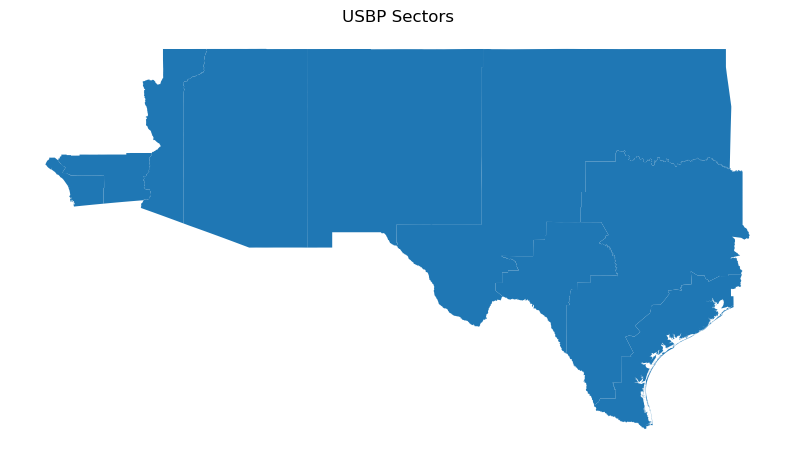

In [67]:
# Asegúramos de que el GeoDataFrame 'gdf_unido' ya está definido y listo para ser utilizado

# Proyectar y visualizar el GeoDataFrame en un mapa
fig, ax = plt.subplots(figsize=(10, 10))  # Ajusta el tamaño del mapa a tu preferencia
gdf_unido.plot(ax=ax)

# Opcional: Configuraciones adicionales para mejorar la visualización
ax.set_title('USBP Sectors')  # Título del mapa
ax.set_xlabel('Longitud')  # Etiqueta del eje X
ax.set_ylabel('Latitud')  # Etiqueta del eje Y

# Eliminar los ejes para una visualización más limpia
plt.axis('off')

# Mostrar el mapa
plt.show()


In [69]:
#Guardamos por si acaso

ruta_destino = '/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/2. datos_estadisticos/2. CBO_Southwest_land_border_events/cbo_sectors_geodata/USBP_Sectors.shp'

# Guardar el GeoDataFrame como un archivo shapefile
gdf_unido.to_file(ruta_destino)

print(f"GeoDataFrame guardado como shapefile en: {ruta_destino}")


GeoDataFrame guardado como shapefile en: /Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/2. datos_estadisticos/2. CBO_Southwest_land_border_events/cbo_sectors_geodata/USBP_Sectors.shp


### Unimos los archivos en un gdp unico


In [71]:
# Unir SWLB_23_USBP con gdf_unido basado en las columnas correspondientes
df_unido = gpd.GeoDataFrame(pd.merge(SWLB_23_USBP, gdf_unido, left_on='Area of Responsibility', right_on='NAME'))

df_unido.head()


,Fiscal Year,Component,Area of Responsibility,Encounter Count,NAME,STATE_NAME,FIPS,SQMI,POPULATION,POP_SQMI,...,CROP_ACR12,AVE_SALE12,NO_FARMS17,AVE_SIZE17,CROP_ACR17,AVE_SALE17,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,2023,U.S. Border Patrol,Big Bend Sector,11823,Big Bend Sector,Oklahoma,40001,577.30,22606,39.2,...,44464.0,145455.0,1031.0,232.0,47565.0,158242.0,1.634451,5.582626e+06,6.308555e+11,"POLYGON ((-11143960.415 4439429.936, -11143401..."
1,2023,U.S. Border Patrol,Del Rio Sector,393226,Del Rio Sector,Texas,48049,956.96,39637,41.4,...,84641.0,21208.0,1838.0,297.0,76623.0,25011.0,2.084641,2.294384e+06,1.054055e+11,"POLYGON ((-11222110.684 3774700.343, -11219985..."
2,2023,U.S. Border Patrol,El Centro Sector,50570,El Centro Sector,California,06025,4480.66,179185,40.0,...,487892.0,4486079.0,396.0,1317.0,504037.0,4696156.0,5.036271,1.178433e+06,4.398638e+10,"POLYGON ((-12741133.491 4039525.088, -12741068..."
3,2023,U.S. Border Patrol,El Paso Sector,427471,El Paso Sector,Texas,48141,1015.29,879919,866.7,...,53280.0,69308.0,656.0,217.0,39915.0,71248.0,2.434524,2.958954e+06,4.680514e+11,"POLYGON ((-11953136.416 4439133.533, -11951122..."
4,2023,U.S. Border Patrol,Laredo Sector,45644,Laredo Sector,Texas,48001,1078.00,61445,57.0,...,70333.0,22278.0,1754.0,228.0,63774.0,52989.0,3.726475,4.755656e+06,3.668109e+11,"POLYGON ((-10948407.396 4049638.474, -10948149..."


#### Descargamos listo para proyectar en ArcGis

.solo shp y gdb funcionan

In [74]:
!pip install fiona --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 14.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: fiona
    Found existing installation: Fiona 1.9.4.post1
    Uninstalling Fiona-1.9.4.post1:
      Successfully uninstalled Fiona-1.9.4.post1


In [72]:
# Especificar la ruta de destino para el shapefile
ruta_destino_shp = '/Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/2. datos_estadisticos/2. CBO_Southwest_land_border_events/cbo_sectors_geodata/USBP_Sectors_Encounters.shp'

# Guardar el GeoDataFrame unido como un archivo shapefile
df_unido.to_file(ruta_destino_shp)

print(f"GeoDataFrame unido guardado como shapefile en: {ruta_destino_shp}")


/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_82049/2416105998.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df_unido.to_file(ruta_destino_shp)


GeoDataFrame unido guardado como shapefile en: /Users/pablouriarte/Documents/1. Expediente Tec de Monterrey/1.Tesis/Mapa_Migracion_Irregular_Mexico/2. datos_estadisticos/2. CBO_Southwest_land_border_events/cbo_sectors_geodata/USBP_Sectors_Encounters.shp


In [75]:
# Asegúrate de que df_unido es tu GeoDataFrame y está listo para ser guardado

# Especifica la ruta al GDB y el nombre de la capa (feature class) dentro del GDB
ruta_gdb = '/path/to/your/geodatabase.gdb'
nombre_capa = 'USBP_Sectors_Unidos'

# Guardar el GeoDataFrame en el GDB
df_unido.to_file(driver='FileGDB', filename=ruta_gdb, layer=nombre_capa)

print(f"GeoDataFrame guardado en GDB: {ruta_gdb}, Capa: {nombre_capa}")

DriverError: unsupported driver: 'FileGDB'